In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = symbols('t', real=True)
    return (integrate(f*conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

# Function to Approximate

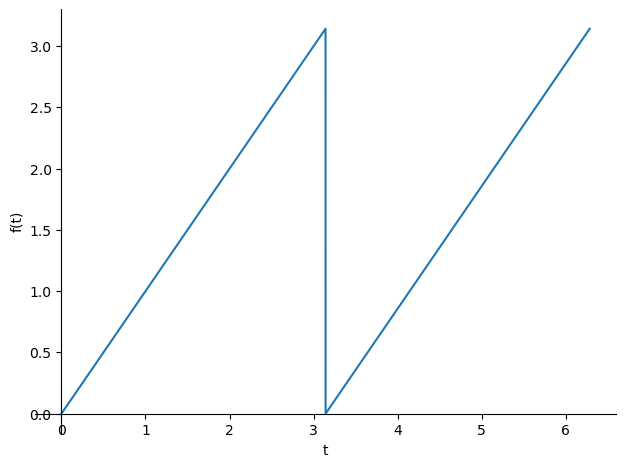

In [49]:
t = symbols('t', real=True)
f = Piecewise(
    (t, t < pi),   # t is zero before time pi
    (t - pi, True),      # otherwise, t is 1
)
plot(f, (t, 0, 2*pi))

# Fourier Series using $\{e^{-ikt}\}$, $k=[-\infty, \dots, \infty]$ as Basis

In [48]:
k = symbols('k', real=True, integer=True)
tau = 2*pi
w0 = 2*pi/tau
psi_k = exp(-I*k*w0*t)

ak = L2_coefficient(f, psi_k, tau)

ak

Piecewise((((-1)**k - 1)/(pi*k**2), (k > 0) | (k < 0)), (pi/2, True))

In [23]:
integrate(f*conjugate(f), (t, 0, 2*pi))/(2*pi)

pi**2/3

In [44]:
# creating ak list
n = 3
ak_list = []
for k in range(-n, n+1):
    if k == 0:
        ak = np.pi/2
    elif k % 2 == 0: # even
        ak = 0
    else:
        ak = -2/(np.pi*k**2)
    ak_list.append(ak)

# compute error in approx p_n(t)
norm_f_sq = np.pi**2/3
error_norm_sq = norm_f_sq
for ak in ak_list:
    error_norm_sq = error_norm_sq - np.abs(ak)**2

error_norm = np.sqrt(error_norm_sq)
error_norm

0.04348026911390171

In [29]:
ak_list

[-0.0707355302630646,
 0,
 -0.6366197723675814,
 1.5707963267948966,
 -0.6366197723675814,
 0,
 -0.0707355302630646]